# Predicting Violent Crime Per Population in US




### Table of Contents

1. [Introduction](#introduction)
2. [Overview](#overview) <br>
    a. [Data Source](#data_source) <br>
    b. [Project Objective](#project_objective) <br>
    c. [Target Feature](#target_feature) <br>
    d. [Imports](#imports) <br>
    e. [Descriptive Features](#descriptive_feature) <br>
3. [Data Preparation](#data_preparation) <br>
    a. [Removing unecessary columns](#removing_columns) <br>
    b. [Removing the null values from the data set](#remove_null) <br>
    c. [Changing the dependent variables from object types into integer types](#changing_dependent) <br>
    d. [Changing variable naming conventions](#changing_name) <br>
    e. [Changing all of the percentage attributes into whole](#changing_percentage) <br>
    f. [Removing Outliers](#removing_outliers)
4. [Data Exploration](#data_exploration) <br>
    a. [Multivariate Data](#multivariate) <br>
    b. [Univariate Visualisation](#univariate) <br>
5. [Statistical Modeling and Performance Evaluation](#modeling) <br>
    a. [Full Model](#full_model) <br>
    b. [Actual vs. Full Model Predicted crimes](#actual_predicted_full) <br>
    c. [Full Model Diagnostic Checks](#full_diagnostic) <br>
    d. [Backwards Feature Selection](#backwards) <br>
    e. [Reduced Model Diagnostic Checks](#reduced_diagnostic) <br>
6. [Summary and Conclusions](#summary_conclusions)
7. [References](#references)

### Introduction <a id="introduction"/>

The objective of this project is to predict the violent crimes in US using multiple linear regression. Day to day, the number of crimes daily are increasing gradually during years. Since crimes can be very dangerours, it has become important to understand the factors that causes to occure in the first place. Building a robust model to understand the factors behind crimes can help authories to prevent crimes in future and to prepare them for future voilent crimes. 

## Overview <a id="overview"/>

### Data Source <a id="data_source"/>

The dataset which is utilsied was attained from the UCI Machine Learning Repository, specifically from the website [Communities and Crimes Unnormalized](http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized)

### Project Objective <a id="project_objective"/>

The aim of this study is to determine how accurate is to predict total violent crimes in US with an acceptable margin of error using multiple linear regression using factors that influence crimes. 

### Target Feature <a id="target_feature"/>

The targer feature for this study is `Total_Crimes`, which is classified as discrete numerical feature. Therefore, making this study as a regression problem.

## Imports <a id='imports'/>

The starting portion of data preparation is to essentially import all the essential modules that will be necessary to: collect the dataset in question, compute various computations with the dataset (creating linear regression graphs and computations for example) and creating various charts and graphs that help visualise the data at hand.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")


This segment of code is in charge of uploading the Crimes and Communities csv file - which contains the the data variables that were mentioned above. The segment also displays the dataset is structured with first 5 rows.

In [2]:
crimeData = pd.read_csv('Group 110_Data.csv')
crimeData.head()

,communityname,State,countyCode,communityCode,fold,population,perHoush,pctBlack,pctWhite,pctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


## Description Features <a id='description_features'/>

The following is a table which gives a description about the features in the dataset

In [3]:
descriptions = { 'communityname': 'Name of the community',
                'State': 'Name of the state of the community in the form of 2 postal 2 letter postal abbreviation',
                'countyCode': 'Variable for county',
                'communityCode': 'Numeric code for community', 
                'fold': 'Variable for validating',
                'population' : 'Population of community',
                'perHoush': 'Mean people per household in the community',
                'pctBlack': 'Percentage of `population` that is african american',
                'pctWhite': 'Percentage of `population` that is caucasian',
                'pctAsian': 'Percentage of `population` that is of asian heritage',
                'pctHisp':  'Percentage of `population` that is of hispanic heritage',
                'pct12-21': 'Percentage of `population` that is 12-21 in age',
                'pct12-29': 'Percentage of `population` that is 12-29 in age',
                'pct16-24': 'Percentage of `population` that is 16-24 in age',
                'pct65up':  'Percentage of `population` that is 65 and over in age',
                'persUrban': 'People living in areas classified as urban in the community',
                'pctUrban': 'Percentage of `population` living in areas classified as urban in the community',
                'medIncome':'Median household income in the community',
                'medFamIncome': 'Median family income in the community',
                'perCapInc': 'Per capita income in the community',
                'whitePerCap': 'Per capita income for caucasians in the community',
                'blackPerCap': 'Per capita income for african americans in the community',
                'NAperCap': 'Per capita income for native americans in the community',
                'asianPerCap': 'Per capita income with asian heritage in the community',
                'otherPerCap': "Per capital with 'other' heritage in the community",
                'hispPerCap': 'Per capital income with hispanic heritage in the community',
                'persPoverty': 'People under poverty in the community',
                'pctPoverty': 'Percentage of `population` under poverty',
                'pctLowEdu': 'Percentage of `population` age 25 and over with less than 9th grade education',
                'pctNotHSgrad': 'Percentage of `population` age 25 and over that are not high school graduates',
                'pctCollGrad': 'Percentage of `population` age 25 and over with higher education degree',
                'pctUnemploy': 'Percentage of `population` age 16 and over, in labor force, who are enemployed',
                'pctEmploy': 'Percentage of `population` age 16 and over are employed',
                'persPerFam': 'Mean number of people per family in the community',
                'numForeignBorn': 'Number of people known to be foreign born in the community',
                'pctFgnImmig-3':'Percentage of `numForeignBorn` who immigrated within last 3 years',
                'pctFgnImmig-5': 'Percentage of `numForeignBorn` who immigrated within last 5 years',
                'pctFgnImmig-8': 'Percentage of `numForeignBorn` who immigrated within last 8 years',
                'pctFgnImmig-10': 'Percentage of `numForeignBorn` who immigrated within last 10 years',
                'pctImmig-3': 'Percentage of `population` who have immigrated within last 3 years',
                'pctImmig-5': 'Percentage of `population` who have immigrated within last 5 years',
                'pctImmig-8': 'Percentage of `population` who have immigrated within last 8 years',
                'pctImmig-10': 'Percentage of `population` who have immigrated within last 10 years',
                'pctSpeakOnlyEng': 'percentage of `population` who  speak only English',
                'pctNotSpeakEng': 'Percentage of `population` who do not speak English well',
                'houseVacant': 'Number of vacant households in the community',
                'persHomeless': 'Number of people in homeless shelter in the community',
                'landArea': 'Land area in squre miles of the community',
                'popDensity': 'Population density in persons per square mile of the community',
                'pctUsePubTrans': 'Percentage of `population`using public transit for commuting',
                'murders': 'Number of murders in the community',
                'murdPerPop': 'Number of murders per 100K population in the community',
                'rapes': 'Number of rapes in the community',
                'rapesPerPop': 'Number of rapes per 100K population in the community',
                'robberies': 'Number of robberies in the community',
                'robbbPerPop': 'Number of robberies per 100K population in the community',
                'assaults': 'Number of assaults in the community',
                'assaultPerPop': 'Number of assaults per 100K population in the community',
                'burglaries': 'Number of burglaries in the community',
                'burglPerPop': 'Number of burglaries per 100K population in the community',
                'larcenies': 'Number of larcenies in the community',
                'larcPerPop': 'Number of larcenies per 100K population in the community',
                'autoTheft': 'Number of autoTheft in the community',
                'autoTheftPerPop': 'Number of autoTheft per 100K population in the community',
                'arsons': 'Number of arsons in the community',
                'arsonsPerPop': 'Number of arsons per 100K population in the community',
                'violentPerPop': 'Number of violent crimes per 100K population in the community',
                'nonViolPerPop': 'Number of non-violent crimes per 100K population in the community'
                }

dataTypes = { 'communityname': 'N/A', 'State': 'N/A', 'countyCode': 'N/A', 'communityCode': 'N/A', 'fold': 'N/A',
                'population' : 'People', 'perHoush': 'People', 'pctBlack': 'People', 'pctWhite': 'People', 'pctAsian': 'People',
                'pctHisp':  'People', 'pct12-21': 'People', 'pct12-29': 'People', 'pct16-24': 'People', 'pct65up':  'People',
                'persUrban': 'People', 'pctUrban': 'People', 'medIncome':'Dollars', 'medFamIncome': 'Dollars', 
                'perCapInc': 'People', 'whitePerCap': 'People', 'blackPerCap': 'People', 'NAperCap': 'People', 
                'asianPerCap': 'People', 'otherPerCap': "People", 'hispPerCap': 'People', 'persPoverty': 'People', 
                'pctPoverty': 'People', 'pctLowEdu': 'People', 'pctNotHSgrad': 'People', 'pctCollGrad': 'People',
                'pctUnemploy': 'People', 'pctEmploy': 'People', 'persPerFam': 'People', 'numForeignBorn': 'People',
                'pctFgnImmig-3':'People', 'pctFgnImmig-5': 'People', 'pctFgnImmig-8': 'People', 'pctFgnImmig-10': 'People',
                'pctImmig-3': 'People', 'pctImmig-5': 'People', 'pctImmig-8': 'People', 'pctImmig-10': 'People',
                'pctSpeakOnlyEng': 'People', 'pctNotSpeakEng': 'People', 'houseVacant': 'House', 'persHomeless': 'People',
                'landArea': 'Miles squared', 'popDensity': 'People per miles squared', 'pctUsePubTrans': 'People',
                'murders': 'N/A', 'murdPerPop': 'N/A', 'rapes': 'N/A', 'rapesPerPop': 'N/A', 'robberies': 'N/A', 
                'robbbPerPop': 'N/A', 'assaults': 'N/A', 'assaultPerPop': 'N/A', 'burglaries': 'N/A', 'burglPerPop': 'N/A',
                'larcenies': 'N/A', 'larcPerPop': 'N/A', 'autoTheft': 'N/A', 'autoTheftPerPop': 'N/A', 'arsons': 'N/A',
                'arsonsPerPop': 'N/A', 'violentPerPop': 'N/A', 'nonViolPerPop': 'N/A'}

feature_explanation = pd.DataFrame(columns = ['Name','Data_Type','units','Description'])
feature_explanation['Name'] = crimeData.columns
feature_explanation['units'] = dataTypes.values()
feature_explanation['Description'] = descriptions.values()
feature_explanation['Data_Type'][:2] = 'Nominal'
feature_explanation['Data_Type'][2:] = 'Numeric'

pd.set_option('display.max_colwidth', -1)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(feature_explanation)

,Name,Data_Type,units,Description
0,communityname,Nominal,N/A,Name of the community
1,State,Nominal,N/A,Name of the state of the community in the form of 2 postal 2 letter postal abbreviation
2,countyCode,Numeric,N/A,Variable for county
3,communityCode,Numeric,N/A,Numeric code for community
4,fold,Numeric,N/A,Variable for validating
5,population,Numeric,People,Population of community
6,perHoush,Numeric,People,Mean people per household in the community
7,pctBlack,Numeric,People,Percentage of `population` that is african american
8,pctWhite,Numeric,People,Percentage of `population` that is caucasian
9,pctAsian,Numeric,People,Percentage of `population` that is of asian heritage


## Data Preparation <a id="data_preparation"/>

Before working on any dataset, it is necessary to clean and have a well structured dataset. There are several following procedures that need to be taken in order to get the ideal datasets:

- Removing unecessary columns
- Removing row with null values
- Changing into correct data types
- Chaning column names as convention
- Changing values to have consistancy
- Removing any outliers


Since this study is focused on the number of total crimes in a community and the dataset does not provide with the total crimes but gives the number of different crimes. So, the `Total_Crimes` is created with values being the sum of `murders`, `rapes`, `robberies`, `assaults`, `burglaries`, `larcenies`, `autoTheft` and `arsons`.  

## Removing unecessary columns <a id='removing_columns'/>

First, it was essential to remove any sort of identifiers from the data - seeing as they will not be helpful to the data exploration of predicting crimes in the US. So the communityName, communityCode, State and countyCode and attributes were ultimately removed from the data. This is so the there is no repetitive data. 

Furthermore, any per capita income data was removed as median household income is a sufficient attribute that gives a rough estimate of general incomes for people that live in the community that is being researched. 

In addition, some of the age range population attributes were removed from the data set. This is because some of the age ranges given in the data set were repetitive, making variable colinear and ultimately only two were kept - the age range of 12 - 29 and 65-up. Some of the year range for percent immigrants were removed from the data set too. The only percent immigrant data that was kept was for the last 10 years so that a rough estimate of all the years in investigation could be evaluated much more easily. 

Finally, crimes that involved per population were removed from the data set as they could serve as repetitive information to the crimes that already are listed in the data set. ViolentCrimesPerPop and NonViolentCrimesPerPop were also removed since the crimes that are being investigated are already violent or non violent and a per population statistic.

In [4]:
crimeDataReduced = crimeData.drop(columns = ['communityname', 'State', 'countyCode', 'communityCode', 'fold', 'pct12-21', 'pct16-24', 'persUrban','pctUrban', 'perCapInc', 
                                             'whitePerCap', 'blackPerCap', 'NAperCap', 'asianPerCap', 'otherPerCap', 
                                             'hispPerCap', 'pctLowEdu', 'pctEmploy', 'pctCollGrad', 'pctSpeakOnlyEng', 'murdPerPop','rapesPerPop', 'robbbPerPop', 'assaultPerPop', 
                                             'burglPerPop', 'larcPerPop', 'autoTheftPerPop', 'arsonsPerPop', 'pctFgnImmig-3',
                                             'pctFgnImmig-5', 'pctFgnImmig-8', 'pctImmig-3', 'pctImmig-5', 'pctImmig-8',
                                             'violentPerPop','nonViolPerPop', 'pctPoverty'])
crimeDataReduced.dtypes

population        int64  
perHoush          float64
pctBlack          float64
pctWhite          float64
pctAsian          float64
pctHisp           float64
pct12-29          float64
pct65up           float64
medIncome         int64  
medFamIncome      int64  
persPoverty       int64  
pctNotHSgrad      float64
pctUnemploy       float64
persPerFam        float64
numForeignBorn    int64  
pctFgnImmig-10    float64
pctImmig-10       float64
pctNotSpeakEng    float64
houseVacant       int64  
persHomeless      int64  
landArea          float64
popDensity        float64
pctUsePubTrans    float64
murders           int64  
rapes             object 
robberies         object 
assaults          object 
burglaries        object 
larcenies         object 
autoTheft         object 
arsons            object 
dtype: object

###  Removing the null values from the data set <a id='remove_null'/>

The data values that where null and had no value whatsoever were associated with "?" in this data set. The reason null values will be removed from the data set is because they do not add any sort of essential information for the objective of this report and also it might essentially signify a lack of data that may have not been collected for the data set. Morever, rows with null values can construct inaccuracy in the prediction model.

In [5]:
for column in crimeDataReduced.columns:
    crimeDataReduced = crimeDataReduced[crimeDataReduced[column] != "?"]
    
crimeDataReduced

,population,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-29,pct65up,medIncome,medFamIncome,...,popDensity,pctUsePubTrans,murders,rapes,robberies,assaults,burglaries,larcenies,autoTheft,arsons
0,11980,3.10,1.37,91.78,6.50,1.88,21.44,11.33,75122,79584,...,1845.9,9.63,0,0,1,4,14,138,16,2
1,23123,2.82,0.80,95.57,3.44,0.85,21.30,17.18,47917,55323,...,2186.7,3.84,0,1,5,24,57,376,26,1
2,29344,2.43,0.74,94.33,3.43,2.35,25.88,10.28,35669,42112,...,2780.9,4.37,3,6,56,14,274,1797,136,22
5,140494,2.45,2.51,95.65,0.90,0.95,32.89,13.26,21577,27705,...,1995.7,0.97,7,77,136,449,2094,7690,454,134
6,28700,2.60,1.60,96.57,1.47,1.10,27.41,14.42,42805,50394,...,2643.5,9.62,0,4,9,54,110,288,144,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,56216,3.07,6.87,61.68,15.23,29.86,30.16,8.08,24727,27388,...,3365.4,0.59,10,30,121,170,1376,2563,489,34
2211,12251,2.68,21.18,76.65,1.52,1.29,31.23,12.57,20321,25000,...,1682.8,1.15,0,4,1,10,104,574,24,2
2212,32824,2.46,0.52,92.62,0.98,11.00,20.96,20.73,27182,34973,...,1195.2,0.12,5,5,24,96,628,895,179,8
2213,13547,2.89,3.37,69.91,0.90,62.11,30.01,10.42,19899,22103,...,2142.2,0.00,0,2,7,79,192,474,13,1


###  Changing the dependent variables from object types into integer types <a id='changing_dependent'/>

Upon checking, the dependent variables (the types of crimes that were recorded for in the data set per community) were initially object types. This will most likely cause errors in future calculations (especially in the data exploration or statistical evaluation proportion of this report. So it is absolutely essential to record all of the dependent variables into an integer. The crime attributes themselves are whole numbers - so it is a fair assumption that all of the crime attributes are of the type integer.

In [6]:
columns_to_change = ['murders', 'rapes', 'robberies', 'assaults', 'burglaries', 'larcenies', 'autoTheft', 'arsons']

for column in columns_to_change:
    crimeDataReduced[column] = crimeDataReduced[column].astype(int)
    
crimeDataReduced.dtypes

population        int64  
perHoush          float64
pctBlack          float64
pctWhite          float64
pctAsian          float64
pctHisp           float64
pct12-29          float64
pct65up           float64
medIncome         int64  
medFamIncome      int64  
persPoverty       int64  
pctNotHSgrad      float64
pctUnemploy       float64
persPerFam        float64
numForeignBorn    int64  
pctFgnImmig-10    float64
pctImmig-10       float64
pctNotSpeakEng    float64
houseVacant       int64  
persHomeless      int64  
landArea          float64
popDensity        float64
pctUsePubTrans    float64
murders           int32  
rapes             int32  
robberies         int32  
assaults          int32  
burglaries        int32  
larcenies         int32  
autoTheft         int32  
arsons            int32  
dtype: object

### Changing variable naming conventions <a id='changing_name'/>

Since a lot of the data variables have a hyphen inside their variable name, it might be fitting to replace all of them with a more appropriate naming convention that will make sense, this is because  the variables with a hyphen will become detrimental upon creating the formula for regression. A hyphen in a variable will alert python to get rid of the variable in question.

In [7]:
crimeDataReduced.columns = [column.replace('-', '_') for column in list(crimeDataReduced.columns)]
crimeDataReduced.columns = [column.strip() for column in list(crimeDataReduced.columns)]
crimeDataReduced

,population,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12_29,pct65up,medIncome,medFamIncome,...,popDensity,pctUsePubTrans,murders,rapes,robberies,assaults,burglaries,larcenies,autoTheft,arsons
0,11980,3.10,1.37,91.78,6.50,1.88,21.44,11.33,75122,79584,...,1845.9,9.63,0,0,1,4,14,138,16,2
1,23123,2.82,0.80,95.57,3.44,0.85,21.30,17.18,47917,55323,...,2186.7,3.84,0,1,5,24,57,376,26,1
2,29344,2.43,0.74,94.33,3.43,2.35,25.88,10.28,35669,42112,...,2780.9,4.37,3,6,56,14,274,1797,136,22
5,140494,2.45,2.51,95.65,0.90,0.95,32.89,13.26,21577,27705,...,1995.7,0.97,7,77,136,449,2094,7690,454,134
6,28700,2.60,1.60,96.57,1.47,1.10,27.41,14.42,42805,50394,...,2643.5,9.62,0,4,9,54,110,288,144,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,56216,3.07,6.87,61.68,15.23,29.86,30.16,8.08,24727,27388,...,3365.4,0.59,10,30,121,170,1376,2563,489,34
2211,12251,2.68,21.18,76.65,1.52,1.29,31.23,12.57,20321,25000,...,1682.8,1.15,0,4,1,10,104,574,24,2
2212,32824,2.46,0.52,92.62,0.98,11.00,20.96,20.73,27182,34973,...,1195.2,0.12,5,5,24,96,628,895,179,8
2213,13547,2.89,3.37,69.91,0.90,62.11,30.01,10.42,19899,22103,...,2142.2,0.00,0,2,7,79,192,474,13,1


### Changing all of the percentage attributes into whole <a id='changing_percentage'/>

Add in the `Total_Crimes` column

In [8]:
crimeDataReduced['Total_Crimes'] = crimeDataReduced['murders'] + crimeDataReduced['rapes'] + crimeDataReduced['robberies'] + crimeDataReduced['assaults'] + crimeDataReduced['burglaries'] + crimeDataReduced['larcenies'] + crimeDataReduced['autoTheft'] + crimeDataReduced['arsons']
        
crimeDataReduced.head()

,population,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12_29,pct65up,medIncome,medFamIncome,...,pctUsePubTrans,murders,rapes,robberies,assaults,burglaries,larcenies,autoTheft,arsons,Total_Crimes
0,11980,3.10,1.37,91.78,6.50,1.88,21.44,11.33,75122,79584,...,9.63,0,0,1,4,14,138,16,2,175
1,23123,2.82,0.80,95.57,3.44,0.85,21.30,17.18,47917,55323,...,3.84,0,1,5,24,57,376,26,1,490
2,29344,2.43,0.74,94.33,3.43,2.35,25.88,10.28,35669,42112,...,4.37,3,6,56,14,274,1797,136,22,2308
5,140494,2.45,2.51,95.65,0.90,0.95,32.89,13.26,21577,27705,...,0.97,7,77,136,449,2094,7690,454,134,11041
6,28700,2.60,1.60,96.57,1.47,1.10,27.41,14.42,42805,50394,...,9.62,0,4,9,54,110,288,144,17,626


This was a pure stylistic choice for the data - maintaining consistancy within the dataset. Whole number data might result in the creation of more helpful charts and graphs - ultimately making it easier for the reader to understand the code at hand. Since all of the percentage values were a percetange of the `population` variable or the `numForeignBorn` variable - each percentage value was converted into a whole based on the those two values

In [9]:
percentage_columns = ['pctNotHSgrad', 'pctBlack','pctWhite','pctAsian','pctHisp','pct12_29','pct65up','pctUnemploy','pctImmig_10','pctNotSpeakEng','pctUsePubTrans']


for column in percentage_columns:
    crimeDataReduced.loc[crimeDataReduced.population > 0,column] = (crimeDataReduced[column]/100) * crimeDataReduced.population
    crimeDataReduced[column] = round(crimeDataReduced[column], 0).astype(int)
    
crimeDataReduced.loc[crimeDataReduced.numForeignBorn > 0, column] = (crimeDataReduced.pctFgnImmig_10/100) * crimeDataReduced.numForeignBorn
crimeDataReduced['pctFgnImmig_10'] = round(crimeDataReduced['pctFgnImmig_10'], 0).astype(int)

crimeDataReduced.columns = [column.replace('pct', 'num') for column in list(crimeDataReduced.columns)]
crimeDataReduced.head()

,population,perHoush,numBlack,numWhite,numAsian,numHisp,num12_29,num65up,medIncome,medFamIncome,...,numUsePubTrans,murders,rapes,robberies,assaults,burglaries,larcenies,autoTheft,arsons,Total_Crimes
0,11980,3.10,164,10995,779,225,2569,1357,75122,79584,...,394.9761,0,0,1,4,14,138,16,2,175
1,23123,2.82,185,22099,795,197,4925,3973,47917,55323,...,432.0000,0,1,5,24,57,376,26,1,490
2,29344,2.43,217,27680,1006,690,7594,3017,35669,42112,...,523.0484,3,6,56,14,274,1797,136,22,2308
5,140494,2.45,3526,134383,1264,1335,46208,18630,21577,27705,...,950.9868,7,77,136,449,2094,7690,454,134,11041
6,28700,2.60,459,27716,422,316,7867,4139,42805,50394,...,732.0312,0,4,9,54,110,288,144,17,626


### Removing Outliers <a id='removing_outliers'/>

The following section have the intention of removing outliers that are present in the dataset. Outliers may end up varying the end results of this study (besides it is not apparent if the outliers may just be errors in the dataset themeselves), so it is best to simply just remove the outliers from the data all together. 

The following box plot (Figure 1 (a) and (b)) evidences prime example of having outliers in `Total_Crimes`

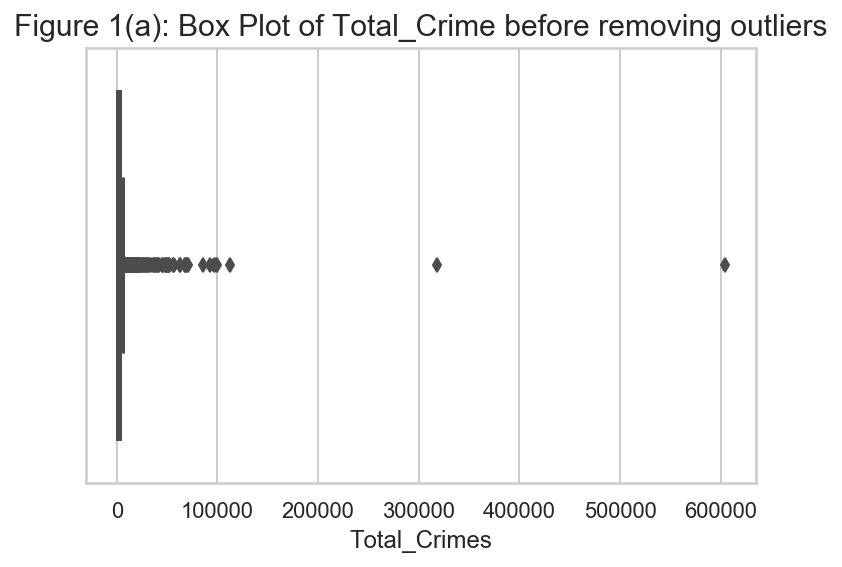

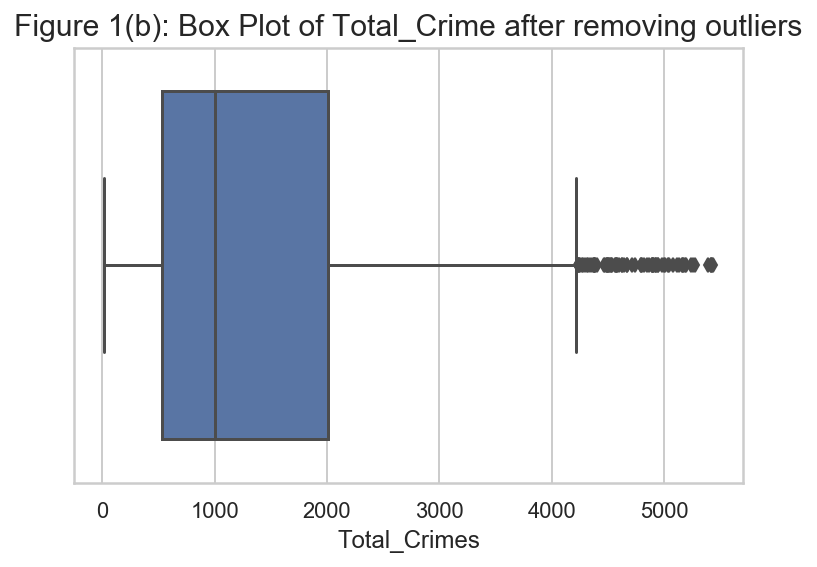

In [10]:
sns.set(style="whitegrid")
sns.boxplot(crimeDataReduced['Total_Crimes']).set_title('Figure 1(a): Box Plot of Total_Crime before removing outliers', fontsize = 15)
plt.show();

Q1 = crimeDataReduced['Total_Crimes'].quantile(0.25)
Q3 = crimeDataReduced['Total_Crimes'].quantile(0.75)
IQR = Q3 - Q1
higher_whisker = (1.5 * IQR) + IQR
crimeDataReduced = crimeDataReduced[crimeDataReduced['Total_Crimes'] < higher_whisker]
crimeDataReduced = crimeDataReduced[crimeDataReduced['persHomeless'] < 200]

sns.boxplot(crimeDataReduced['Total_Crimes']).set_title('Figure 1(b): Box Plot of Total_Crime after removing outliers', fontsize = 15)
plt.show();

In [11]:
crimeDataReduced

,population,perHoush,numBlack,numWhite,numAsian,numHisp,num12_29,num65up,medIncome,medFamIncome,...,numUsePubTrans,murders,rapes,robberies,assaults,burglaries,larcenies,autoTheft,arsons,Total_Crimes
0,11980,3.10,164,10995,779,225,2569,1357,75122,79584,...,394.9761,0,0,1,4,14,138,16,2,175
1,23123,2.82,185,22099,795,197,4925,3973,47917,55323,...,432.0000,0,1,5,24,57,376,26,1,490
2,29344,2.43,217,27680,1006,690,7594,3017,35669,42112,...,523.0484,3,6,56,14,274,1797,136,22,2308
6,28700,2.60,459,27716,422,316,7867,4139,42805,50394,...,732.0312,0,4,9,54,110,288,144,17,626
7,59459,2.45,8443,50463,238,375,16607,8681,23221,28901,...,171.0236,8,34,98,128,608,2250,125,9,3260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,56216,3.07,3862,34674,8562,16786,16955,4542,24727,27388,...,6406.7313,10,30,121,170,1376,2563,489,34,4793
2211,12251,2.68,2595,9390,186,158,3826,1540,20321,25000,...,208.0100,0,4,1,10,104,574,24,2,719
2212,32824,2.46,171,30402,322,3611,6880,6804,27182,34973,...,645.0208,5,5,24,96,628,895,179,8,1840
2213,13547,2.89,457,9471,122,8414,4065,1412,19899,22103,...,63.9939,0,2,7,79,192,474,13,1,768


## Data Exploration <a id="data_exploration"/>

In [12]:
crimeDataReduced.dtypes

population        int64  
perHoush          float64
numBlack          int32  
numWhite          int32  
numAsian          int32  
numHisp           int32  
num12_29          int32  
num65up           int32  
medIncome         int64  
medFamIncome      int64  
persPoverty       int64  
numNotHSgrad      int32  
numUnemploy       int32  
persPerFam        float64
numForeignBorn    int64  
numFgnImmig_10    int32  
numImmig_10       int32  
numNotSpeakEng    int32  
houseVacant       int64  
persHomeless      int64  
landArea          float64
popDensity        float64
numUsePubTrans    float64
murders           int32  
rapes             int32  
robberies         int32  
assaults          int32  
burglaries        int32  
larcenies         int32  
autoTheft         int32  
arsons            int32  
Total_Crimes      int32  
dtype: object

## Multivariate Visualisation <a id='multivariate'/>

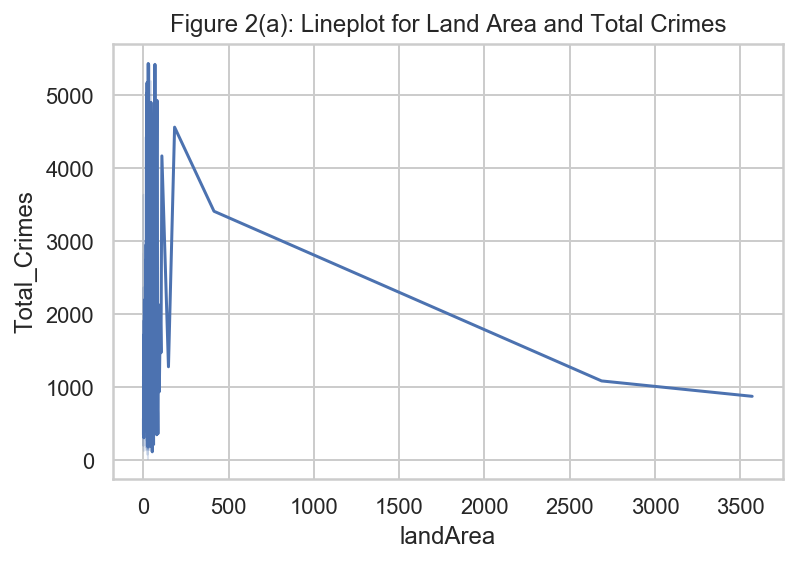

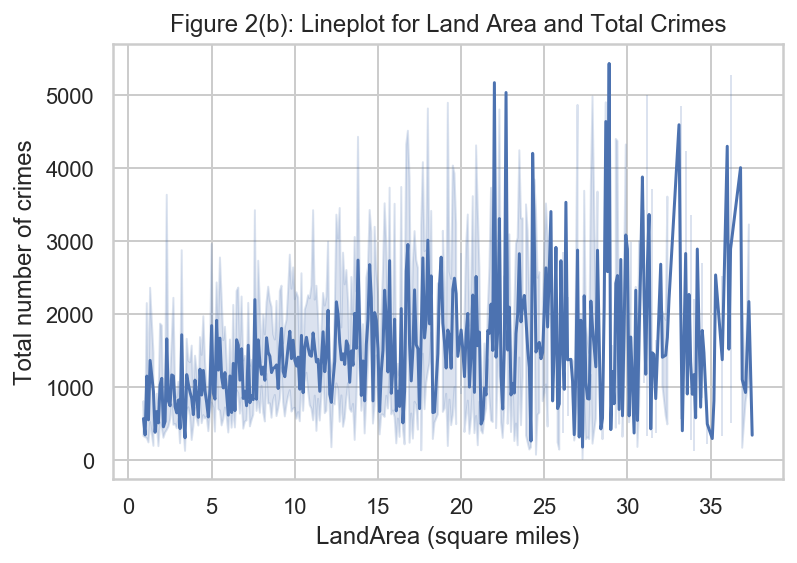

In [13]:
sns.lineplot(data = crimeDataReduced, x='landArea', y="Total_Crimes")
plt.title('Figure 2(a): Lineplot for Land Area and Total Crimes')
plt.show()

Q1 = crimeDataReduced['landArea'].quantile(0.25)
Q3 = crimeDataReduced['landArea'].quantile(0.75)
IQR = Q3 - Q1
higher_whisker = (1.5 * IQR) + IQR
crimeDataReduced = crimeDataReduced[crimeDataReduced['landArea'] < higher_whisker]

sns.lineplot(data = crimeDataReduced, x='landArea', y="Total_Crimes")
plt.xlabel("LandArea (square miles)")
plt.ylabel("Total number of crimes")
plt.title('Figure 2(b): Lineplot for Land Area and Total Crimes')

plt.show()

Here, the line graph in Figure 2(a), shows the relation between total crimes and land area. 
Majority of the data lies betweeen 0 and 100 and then we see a downfall trend as the land area increases, total crimes are decreasing. This tells us that crimes in large land areas are less to occur than small land areas.
As we can see due to some outliers we are not able to see the exact trend so in the next graph we have removed the outliers from the graph so that we can observe the trend more precisely.

Here, 1st and 3rd quantile has been calculated and then IQR range has been calculated using the formula (3rd - 1st) quantile. Then the outliers has been removed the dataset to gain more precision and to see the trends more clearly.

After removing outliers, the graph between total crimes and land area has been plotted again Figure 2(b).
As the land area is increasing the total number of crimes is also increasing with some ups and downs. There are some peaks in total numer of crimes as well which goes above 5000.
As we see majority of the data lies between land area of 0 and 40 square miles. So, majority of the crimes have been done with these land areas.

## Univariate Visualisation <a id='univariate'/>

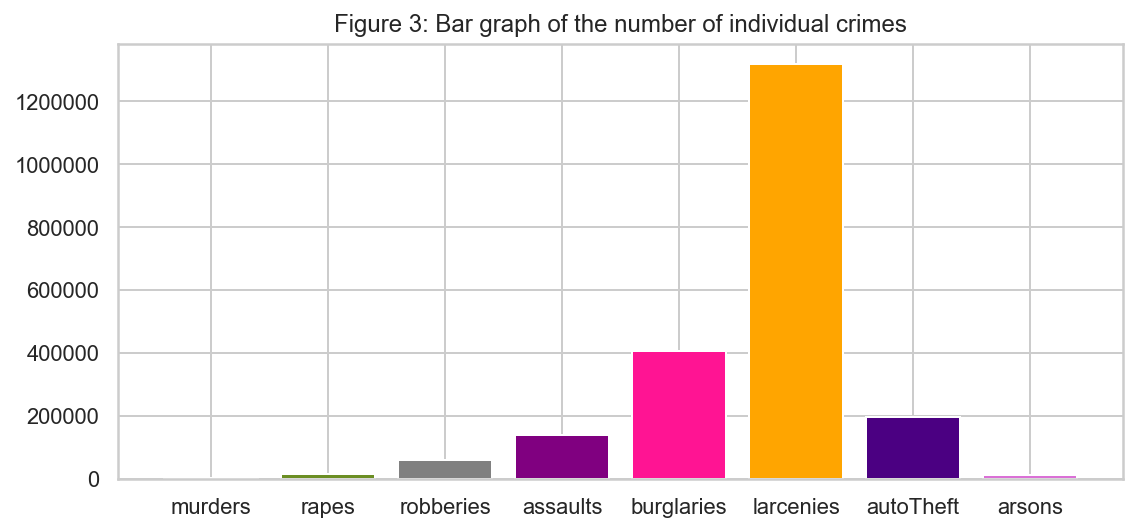

In [14]:
plt.subplots(figsize=(9,4))
plt.bar(['murders','rapes','robberies','assaults','burglaries','larcenies','autoTheft','arsons'],
        [crimeDataReduced['murders'].sum(),crimeDataReduced['rapes'].sum(),crimeDataReduced['robberies'].sum(),
        crimeDataReduced['assaults'].sum(),crimeDataReduced['burglaries'].sum(),crimeDataReduced['larcenies'].sum(),
        crimeDataReduced['autoTheft'].sum(),crimeDataReduced['arsons'].sum()],
        color=['goldenrod', 'olivedrab', 'Grey', 'Purple', 'deeppink','Orange','indigo','orchid'])
plt.title('Figure 3: Bar graph of the number of individual crimes')

plt.show()

The bar chart in Figure 3, illustrates the number of individual crimes happened in past years in United States. 
As we can see the larcenies is the crime happened maximum number of times with a value which goes above $1200000$. Then after that, its burglaries which happened most with a value of $400000$. The graph shows autoTheft is also a common crime occurs mostly and its also one of the top crimes with a value of $200000$. There are two crimes which happened equally and are almost rare which are rapes and arsons who have values just above zero. And there is one crime i.e. murders which has a value almost zero which means it happened very rarely in US.

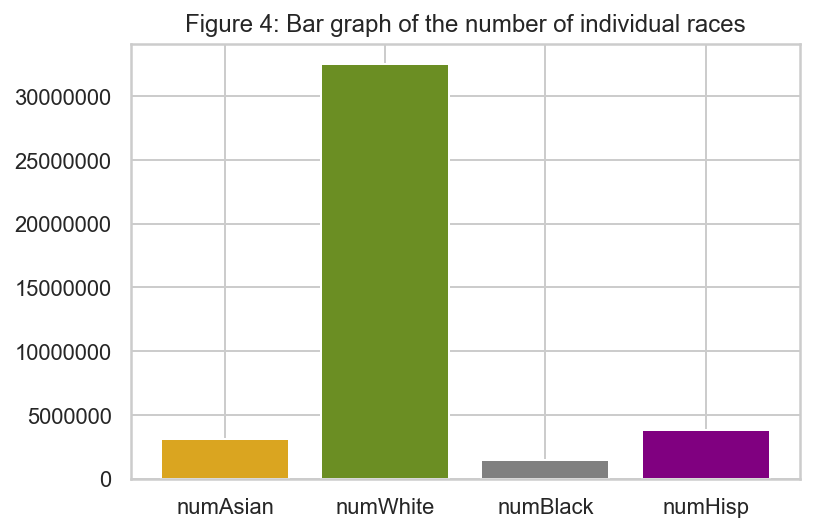

In [15]:
columns = ['numAsian','numWhite','numBlack','numHisp']
plt.subplots(figsize=(6,4))
plt.bar(columns,
        [crimeDataReduced['numBlack'].sum(),crimeDataReduced['numWhite'].sum(),crimeDataReduced['numAsian'].sum(),
        crimeDataReduced['numHisp'].sum()],
        color=['goldenrod', 'olivedrab', 'Grey', 'Purple', 'deeppink','Orange','indigo','orchid'])
plt.title('Figure 4: Bar graph of the number of individual races')
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()

This bar graph from Figure 4, shows the population present in each of the communities. It can be clearly seen that majority of population is of white people among all of the communities with a value above $3.0 * 10^7$. It can also been seen that number of asian people and number of hisp people are almost have almost same population. However, there with a slightly difference, number of Hisp people comes out to be more that number of Asian people with values $0.4 * 10^7$ and $0.3 * 10^7$ respectively. There is surprise thing to notice that the number of black people are least present in the population among all of the communities with a value $0.1 * 10^7$.

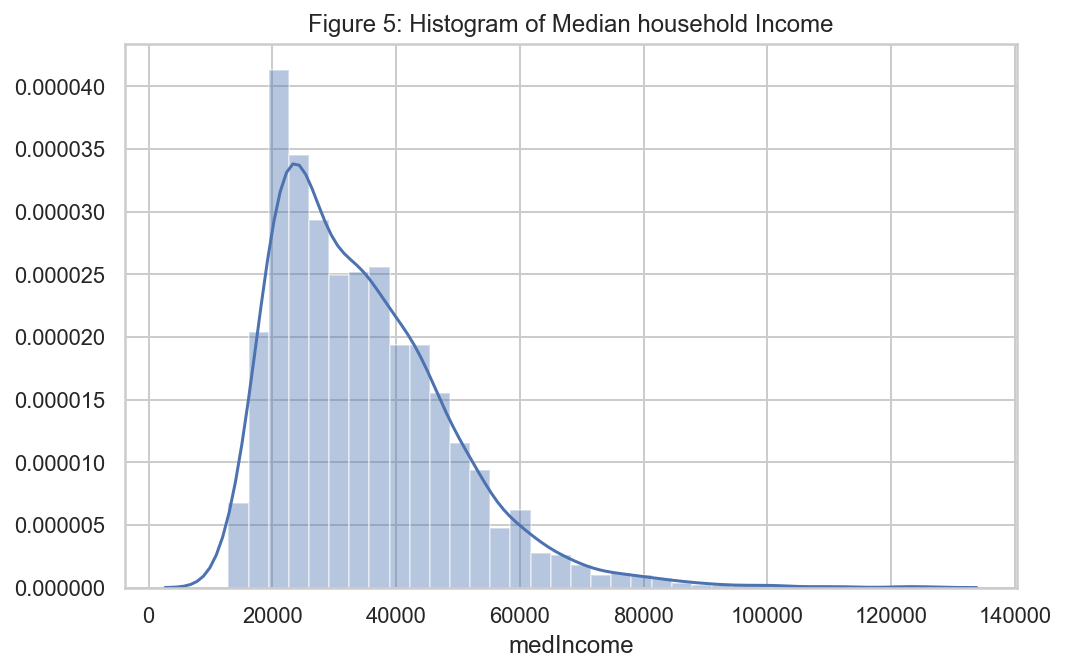

In [16]:
plt.subplots(figsize=(8,5))
sns.distplot(crimeDataReduced['medIncome'],kde = True)
plt.title('Figure 5: Histogram of Median household Income')
plt.show()

The plot in Figure 5, illustrates the trend of median household income. 
This plot is right skewed. There are some peaks with values of $\$20000$ and just above that. After that there is a gradual decrease which is reaching zero at approximate value $\$130000$. 
It shows that majority of the household have a income of $\$20000$ and $\$30000$. And ther are very less households which earn good amount of money i.e. $\$60000$ and above.
We also got to see that there is less number of households who earn around $\$50000$ but there are more number of households earn around $\$60000$ 

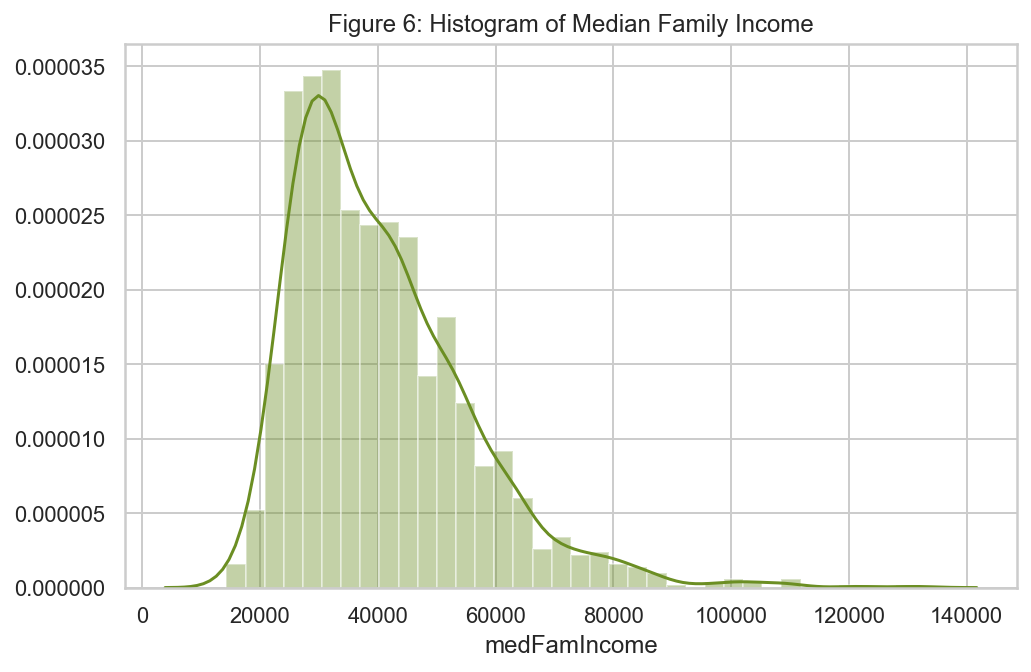

In [17]:
plt.subplots(figsize=(8,5))
sns.distplot(crimeDataReduced['medFamIncome'],color = "olivedrab")
plt.title('Figure 6: Histogram of Median Family Income')
plt.show()

The plot in Figure 6, illustrates the trend of median family income. 
This plot is right skewed. There are some peaks with values from $\$25000$ to $\$35000$ which means majority of the families have this much of income. After that there is a gradual decrease which is reaching zero at around $\$140000$. 
This shows there are less number of families you earn good amount of money. Which shows majority of the families lives a middle class life. 
It can be seen that some families have an income of moe than $\$100000$. 

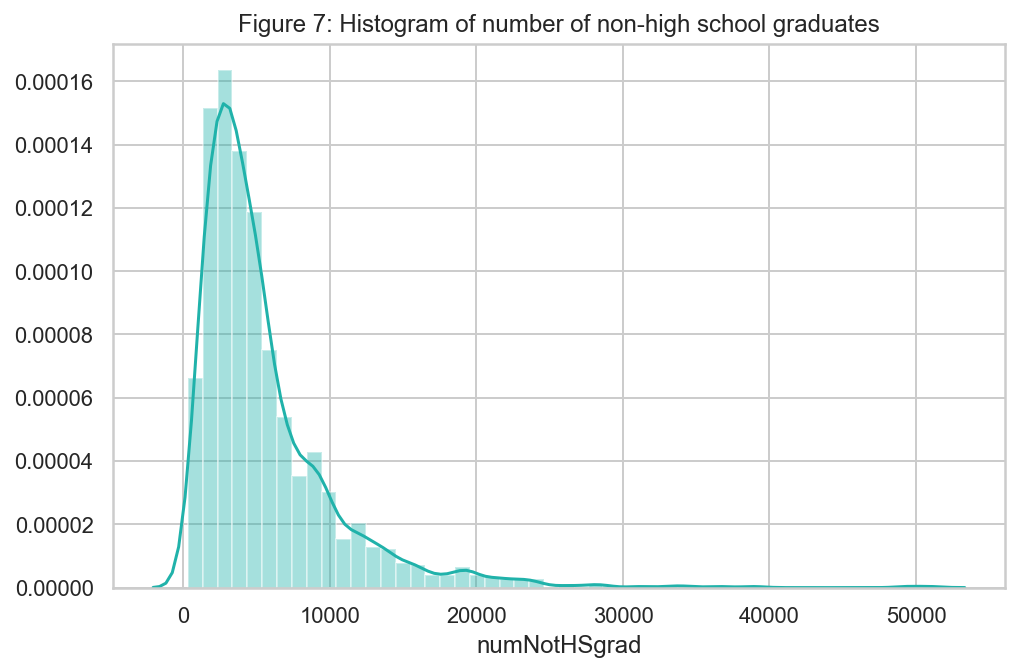

In [18]:
plt.subplots(figsize=(8,5))
sns.distplot(crimeDataReduced['numNotHSgrad'],color = "lightseagreen")
plt.title('Figure 7: Histogram of number of non-high school graduates')
plt.show()

The plot in Figure 7, showcases a histogram of the number of people in communities that have not graduated from HS and are more than the age of 25. The plot as it can be seen below is clearly right skewed and unimodal - peaking at around 4000-5000 non graduates. From then on, the number of non graduates seems to decrease more and more - where there are only a few communities (potential outliers) that have about 50000 non graduates within them. It can be analysed that there are only a small number of people that are not high school graduates. There is some possibility that this may have an effect on crimes as a whole.

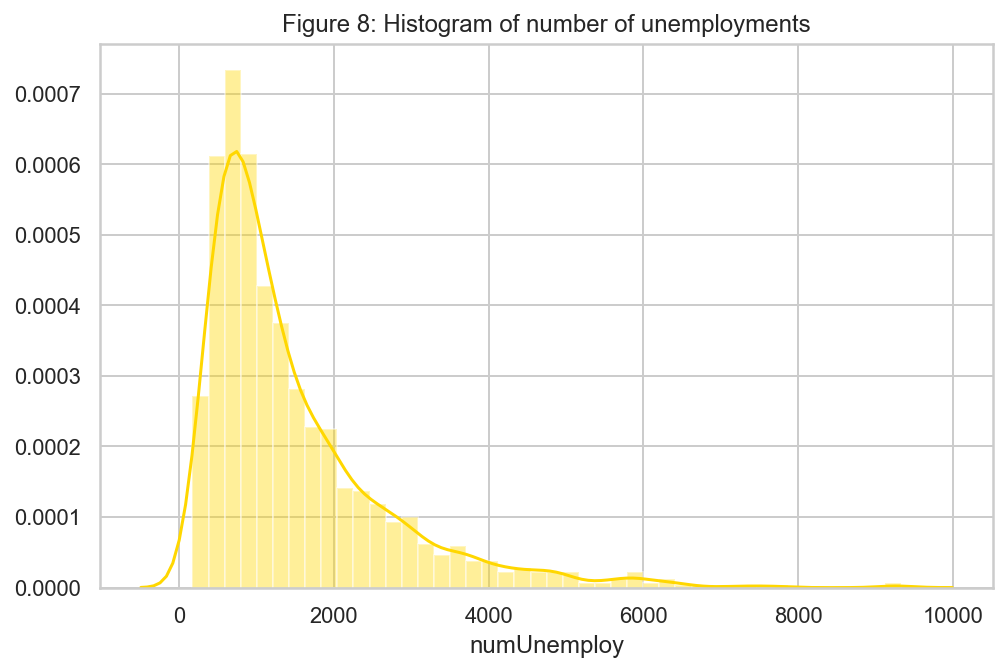

In [19]:
plt.subplots(figsize=(8,5))
sns.distplot(crimeDataReduced['numUnemploy'],color = "gold")
plt.title('Figure 8: Histogram of number of unemployments')
plt.show()

This plot in Figure 8, is the histogram for the number of unemployed people in US communities is also skewed to the right and unimodal. The centre of distribution seems to be near 900-1000 of unemployed people per community. This piece of information will serve to be vital in analysis with comparing it crime. Furthermore, there are not a lot of communities that seem to have immense amounts of unemployed people within the population either (only a few communities have up to 10000 unemployed people).

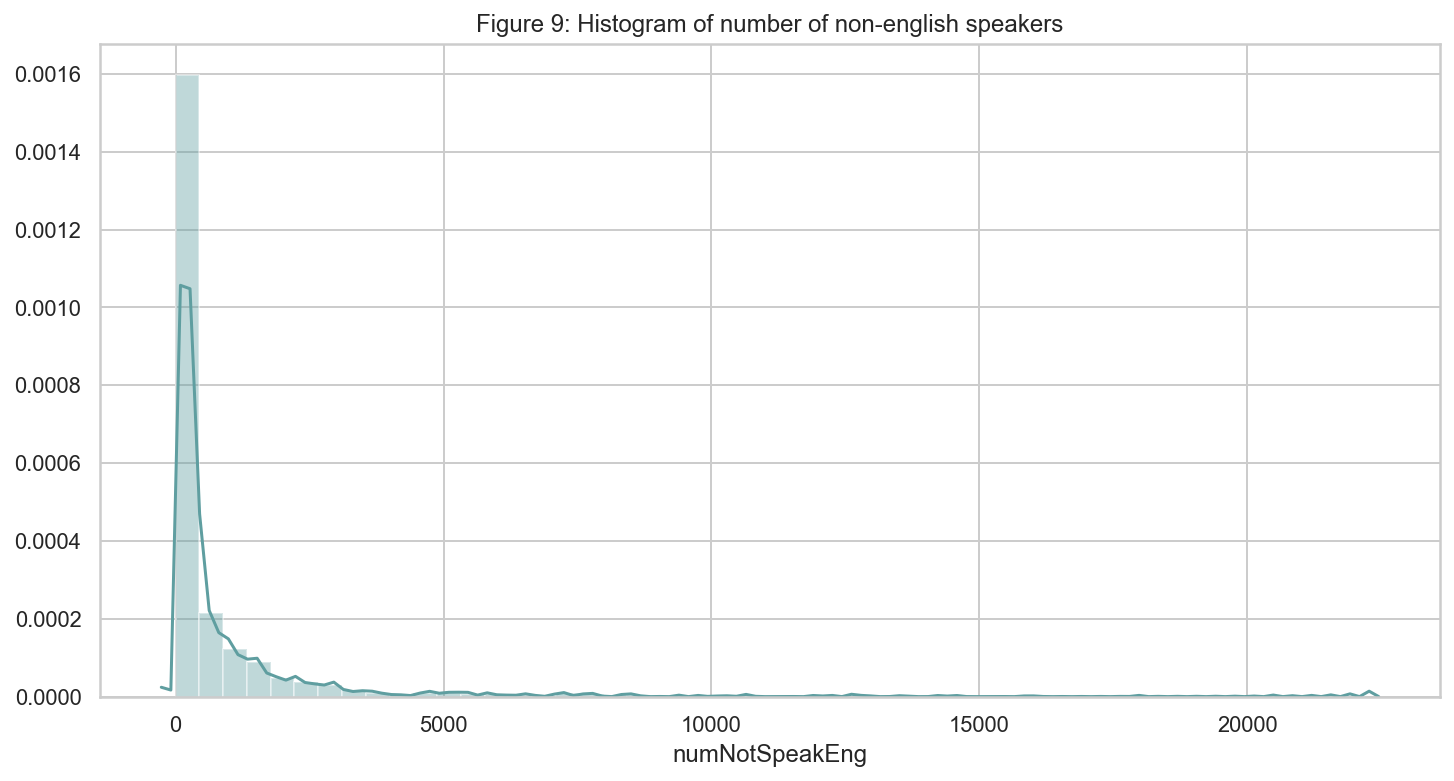

In [20]:
plt.subplots(figsize=(12,6))
sns.distplot(crimeDataReduced['numNotSpeakEng'], color = 'cadetblue')
plt.title('Figure 9: Histogram of number of non-english speakers')
plt.show()

This plot in Figure 9, seems to peak in the area where there are not many people that are not able to speak english. This could be a slight indication that a english speaking populace and crimes may not share a distinct relationship. 

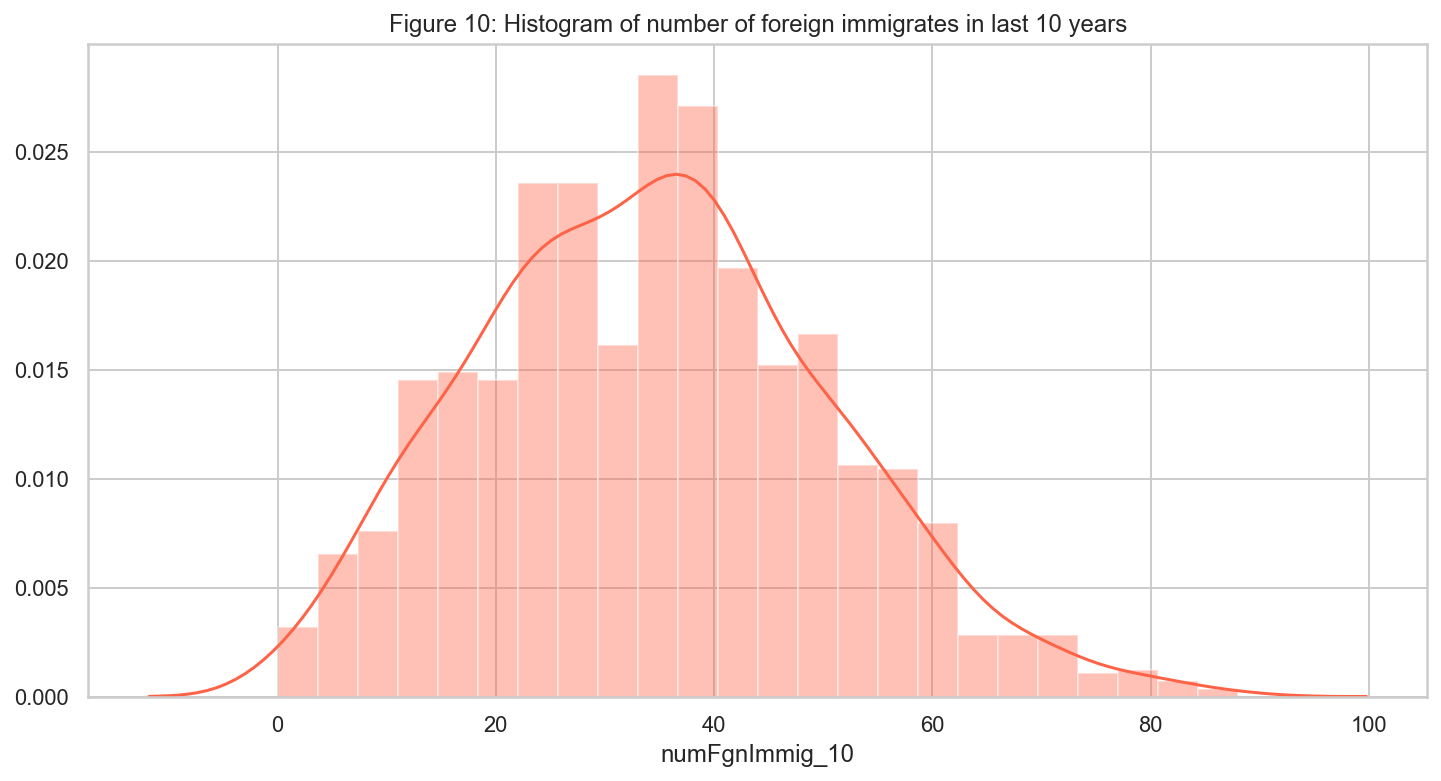

In [21]:
plt.subplots(figsize=(12,6))
sns.distplot(crimeDataReduced['numFgnImmig_10'], color = 'tomato')
plt.title('Figure 10: Histogram of number of foreign immigrates in last 10 years')
plt.show()

The plot in Figure 10 seems to be the only data seems to be well spread about. The data is quite symmetric and can also be seen to be multimodel. The centre of distribution is near 35 to 40 foreign immigrants for particular communities. From the looks of this histogram, number of foreign immigrants will definitely serve as a likely contributant to crimes.

# Statistical Modeling and Performance Evaluation <a id='modeling'/>

**Statistical Modeling** is a mathematical process that allows to understand and intercept the data more strategically. This model identifies any relationships between the explantory and response variables. In addition, modeling is a way of training machine learning and artificial intellegence systems (Stobierski, 2019).

There are few different techiques to build up a model, but this study focuses on **Linear Regression Modeling**. This common and traditional method gives an insight of which independent variable holds the most influence over the dependent variables (Stobierski, 2019).


In the beginning, a full model is generated where all the independent variables of `crimeDataReduced` are included in the modeling. Thus, making the model as a **Multiple Linear Regression Modeling**. The dependent variable for this study is `Total_Crimes`, which is the sum of all dependent variables (`murders`, `rapes`, `robberies`, `assaults`, `burglaries`, `larcenies`, `autoTheft`, `arsons`) from the orginal dataset.

## Full Model <a id='full_model'/>

The following is the data that will be used to construct a regression.

In [22]:
crimeDataReduced

,population,perHoush,numBlack,numWhite,numAsian,numHisp,num12_29,num65up,medIncome,medFamIncome,...,numUsePubTrans,murders,rapes,robberies,assaults,burglaries,larcenies,autoTheft,arsons,Total_Crimes
0,11980,3.10,164,10995,779,225,2569,1357,75122,79584,...,394.9761,0,0,1,4,14,138,16,2,175
1,23123,2.82,185,22099,795,197,4925,3973,47917,55323,...,432.0000,0,1,5,24,57,376,26,1,490
2,29344,2.43,217,27680,1006,690,7594,3017,35669,42112,...,523.0484,3,6,56,14,274,1797,136,22,2308
6,28700,2.60,459,27716,422,316,7867,4139,42805,50394,...,732.0312,0,4,9,54,110,288,144,17,626
8,74111,2.46,259,71969,926,541,26057,6359,25326,34269,...,794.9282,0,35,16,41,425,3149,206,8,3880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,56216,3.07,3862,34674,8562,16786,16955,4542,24727,27388,...,6406.7313,10,30,121,170,1376,2563,489,34,4793
2211,12251,2.68,2595,9390,186,158,3826,1540,20321,25000,...,208.0100,0,4,1,10,104,574,24,2,719
2212,32824,2.46,171,30402,322,3611,6880,6804,27182,34973,...,645.0208,5,5,24,96,628,895,179,8,1840
2213,13547,2.89,457,9471,122,8414,4065,1412,19899,22103,...,63.9939,0,2,7,79,192,474,13,1,768


First of all it is important to understand how a multiple linear regression model looks like. In enssence, a multiple regression model is a linear model with more than one predictors. The model can be written as 

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_kx_k$$

when there are $k$ predictors and $\beta_0$ is the intercept and $\beta_i$ is the estimate parameter for each variable (David Diez, 2019).

The initial step is to build a regression formula with all the variables. This can be done by first removing all the dependent variables and then joining all the independent variables as a string.

In [23]:
dependent_vars = ['murders', 'rapes', 'robberies', 'assaults', 'burglaries', 'larcenies', 'autoTheft', 'arsons', 'Total_Crimes']
formula_string_indep_vars = ' + '.join(crimeDataReduced.drop(columns = dependent_vars).columns)
formula_string = 'Total_Crimes ~ ' + formula_string_indep_vars
print(formula_string)

Total_Crimes ~ population + perHoush + numBlack + numWhite + numAsian + numHisp + num12_29 + num65up + medIncome + medFamIncome + persPoverty + numNotHSgrad + numUnemploy + persPerFam + numForeignBorn + numFgnImmig_10 + numImmig_10 + numNotSpeakEng + houseVacant + persHomeless + landArea + popDensity + numUsePubTrans


Estimates of the parameters are produced with the help of `formula.ols` function from the `statsmodels.api` module which takes in a `formula_string` as a string and `crimeDataReduced` as the data.

When working with this `ols` (ordinary least squares) function, one hurdle needs to be taken into consideration, that is the function cannot work with categorical features where they take non-numerical values. To solve this issue, "one-hot-encoding" of categorical features needs to be done. The function to apply "one-hot-encoding" is `get_dummies()` from the `Pandas` module and then can construct a new formula string with encoded features.

However, the `crimeDataReduced` does not have any categorical variables, so there is no need of doing "one-hot-encoding" and construction of the model can be continued. 

In [24]:
model_full = sm.formula.ols(formula = formula_string, data = crimeDataReduced)
model_full_fitted = model_full.fit()
print(model_full_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_full_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_full_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_full_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_full_fitted.rsquared_adj:.4f}")

                            OLS Regression Results                            
Dep. Variable:           Total_Crimes   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     241.0
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:09:44   Log-Likelihood:                -11863.
No. Observations:                1539   AIC:                         2.377e+04
Df Residuals:                    1515   BIC:                         2.390e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1548.2367    296.911      5.

The above table includes the model intercept and estimate parameters for all the independent features. With this table, it is possible to subsitute the intercept and the estimate parameters. 

$$\hat{y} = 1569.6734 + 0.0989x_1 - 310.9576x_2 + 0.0115x_3 - 0.0492x_4 - 0.0402x_5 + 0.0354x_6 - 0.0449x_7 - 0.0136x_8 + 0.0156x_9 - 0.0202x_{10} + 0.1043x_{11} - 0.0121x_{12} - 0.0397x_{13} - 56.0653x_{14} - 0.0270x_{15} + 6.0084x_{16} - 9.8965x_{17} - 0.0853x_{18} + 0.0834x_{19} + 5.5861x_{20} - 1.6127x_{21} - 0.0103x_{22} + 9.9180x_{23}$$

With the given dataset, the intercept can be interpreted as when `population`, `perHoush`, `numBlack`, `numWhite`, `numAsian`, `numHisp`, `num12_29`, `num65up`, `medIncome`, `medFamIncome`, `persPoverty`, `numNotHSgrad`, `numUnemploy`, `persPerFam`, `numForeignBorn`, `numFgnImmig_10`, `numImmig_10`, `numNotSpeakEng`, `houseVacant`, `persHomeless`, `landArea`, `popDensity` and `numUsePubTrans` take the value $0$, the average number of total crimes in the community will be $1176$. This is because, 

$$\hat{y} = 1175.8101 + 0.0989(0) - 310.9576(0) + 0.0115(0) - 0.0492(0) - 0.0402(0) + 0.0354(0) - 0.0449(0) - 0.0136(0) + 0.0156(0) - 0.0202(0) + 0.1043(0) - 0.0121(0) - 0.0397(0) - 56.0653(0) - 0.0270(0) + 6.0084(0) - 9.8965(0) - 0.0853(0) + 0.0834(0) + 5.5861(0) - 1.6127(0) - 0.0103(0) + 9.9180(0) = 1175.8101$$

It is obvious that the intercept does not make any sense in context as there cannot be any community where there is $0$ and still having a crime of 1175.

Moreover, interpreting the slope for each variable is useful to know.
- **Slope of population**: All else held constant, community that have 1 more person in population tend to have about **0.0892 more** crimes.

- **Slope of perHoush**: All else held constant, community that on average 1 more person per household tend to have about **233.4844 less** crimes.

- **Slope of numBlack**: All else held constant, community that have 1 more african american person in population tend to have about **0.0262 more** crimes.

- **Slope of numWhite**: All else held constant, community that have 1 more caucasian person in population tend to have about **0.0317 less** crimes.

- **Slope of numAsian**: All else held constant, community that have 1 more asian person in population tend to have about **0.0172 less** crimes.

- **Slope of numHisp**: All else held constant, community that have 1 more hispanic person in population tend to have about **0.0364 more** crimes.

- **Slope of num12_29**: All else held constant, community that have 1 more person of ages 12 to 29 tend to have **0.0529 less** crimes.

- **Slope of num65up**: All else held constant, community that have 1 more person of ages 65 or more tend to have **0.0395 less** crimes.

- **Slope of medIncome**: All else held constant, community that have on average 1 more in median household income, tend to have **0.0238 more** crimes.

- **Slope of medFamIncome**: All else held constant, community that have 1 more in median family income tend to have about **0.0271 less** crimes.

- **Slope of persPoverty**: All else held constant, community that have 1 more person under poverty tend to have about **0.1226 more** crimes.

- **Slope of numNotHSgrad**: All else held constant, community that have 1 more person at the age of 25 or more that is not a high school graduate tend to have **0.0059 more** crimes.

- **Slope of numUnemploy**: All else held constant, community that have 1 more person at the age of 16 or more, eligible to work, that is unemployed tend to have **0.0743 less** crimes.

- **Slope of persPerFam**: All else held constant, community that on average have 1 more person in the mean number of people per family tend to have **262.6029 less** crimes.

- **Slope of numForeignBorn**: All else held constant, community that have 1 more person in the number of people who are foreign born tend to have  **0.0476 less** crimes.

- **Slope of numFgnImmig_10**: All else held constant, community that have 1 more person that is foreign born and immigrated in the last 10 years tend to have **5.4370 more** crimes.

- **Slope of numImmig_10**: All else held constant, community that have 1 more person that is part of the population and immigrated in the last 10 years tend to have **24.5340 more** crimes.

- **Slope of numNotSpeakEng**: All else held constant, community that have 1 more person that does not speak english well tend to have **0.0747 less** crimes.

- **Slope of houseVacant**: All else held constant, community that on average 1 more household vacant tend to have  **0.1427 more** crimes.

- **Slope of persHomeless**: All else held constant, community that have 1 more person living in a homeless shelter tend to have **8.3456 more** crimes.

- **Slope of landArea**: All else held constant, community that on average have 1 more land area in square miles tend to have about **4.2437 less** crimes.

- **Slope of popDensity**: All else held constant, community that have 1 more population density in peeple per square miles tend to have **0.0155 less** crimes.

- **Slope of numUsePubTrans**: All else held constant, community that on average have 1 more person utilising public transport tend to have**24.4800 less** crimes.

The slopes also convey the modality of the correlation between the features and the total crimes. If the modality of the slope is positive or negative, the correlation between the feature and the total crimes is also positive or negative respectively. In other words if the slope of a variable is positive and increasing the variable will result in increasing in total crimes. On the other hand, if the slope of a variable is negative and increasing the variable will result in decreasing in total crimes.

The full model has an adjusted R-squared value of 0.782, which means that 78.2% of the variance is explained by the model. Having a 0.782 as the adjusted R-squared is a good indication especially for a full model as it tells how accurate is the model for predicting the total crimes in a community with given independent variables

In addition, the p-value column shows how significant is the variable to predict the crimes. It can be observed that the majority of the explanatory variables are highly significant. Nonetheless, there are some insignificant features which are less than the 5% significance level. 

## Actual vs. Full Model Predicted crimes <a id='actual_predicted_full'/>

It is important to know the differences in the value of the actual total crimes (from the dataset) and predicted total crimes with the residuals.

In [25]:
residuals_full = pd.DataFrame({'actual': crimeDataReduced['Total_Crimes'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,175,232.806148,-57.806148
1,490,731.083040,-241.083040
2,2308,1366.412700,941.587300
6,626,1006.323552,-380.323552
8,3880,3981.222457,-101.222457
11,3092,2331.768648,760.231352
12,2891,2909.224202,-18.224202
16,1468,1762.224569,-294.224569
18,552,505.556410,46.443590
22,928,1541.411804,-613.411804


In regression modeling, residual is refered to as the difference between the observed (actual) $(y_i)$ and predicted $(\hat{y_i})$

$$e_i = y_i - \hat{y_i}$$

Having higher residual (regardless being positive or negative) simply means that actual and predicted value are high. Having a positive residual reveals that the model under-predicted for that particular instance, and having negative residual reveals that the model over-predicted for that particular instance.

Lets visualize a scatter plot to have a better undestanding between the actual and predicted values

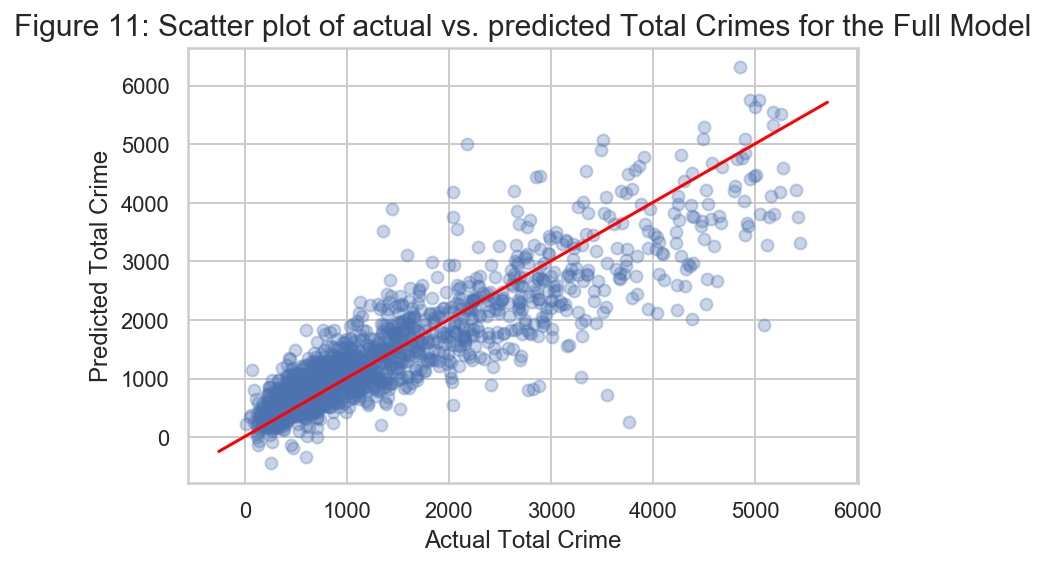

In [26]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=10, c="red");
plt.xlabel('Actual Total Crime');
plt.ylabel('Predicted Total Crime');
plt.title('Figure 11: Scatter plot of actual vs. predicted Total Crimes for the Full Model', fontsize=15);
plt.show();

Figure 11 above is the scatter plot for actual vs predicted total crimes for the full model. The ideal scenario would be that all the dots on the graph tend to be near and coincide with the red line that has a slope of 1 (which is a perfect equivalence between predicted total crimes and actual total crimes). 

The graph starts of with having a lot of these values coincide with the line. However, that does tend to disperse as the amount of actual total crimes increases. There is one key observation with this graph, all points of actual total crimes before 2500 tends to showcase that the predicted total crime has overestimated the true values and predicted values after 2500 tends to underestimate the true values. 

Furthermore, There are a few points where actual crime and predicted crime do not coincide. For instance there is a point in actual total crime that is 5000 but only 2000 in predicted crime. To account for these values - maybe a reduced model of the relationship needs to also be displayed.

## Full Model Diagnostic Checks <a id='full_diagnostic'/>

Multiple regression methods which uses the model

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_kx_k$$

generally depend on four conditions (David Diez, 2019). These conditions are:

1. Each variable is linearly related to the outcome
2. The residuals are independent
3. The variability of the residuals is nearly constant
4. The residuals of the model are nearly normal

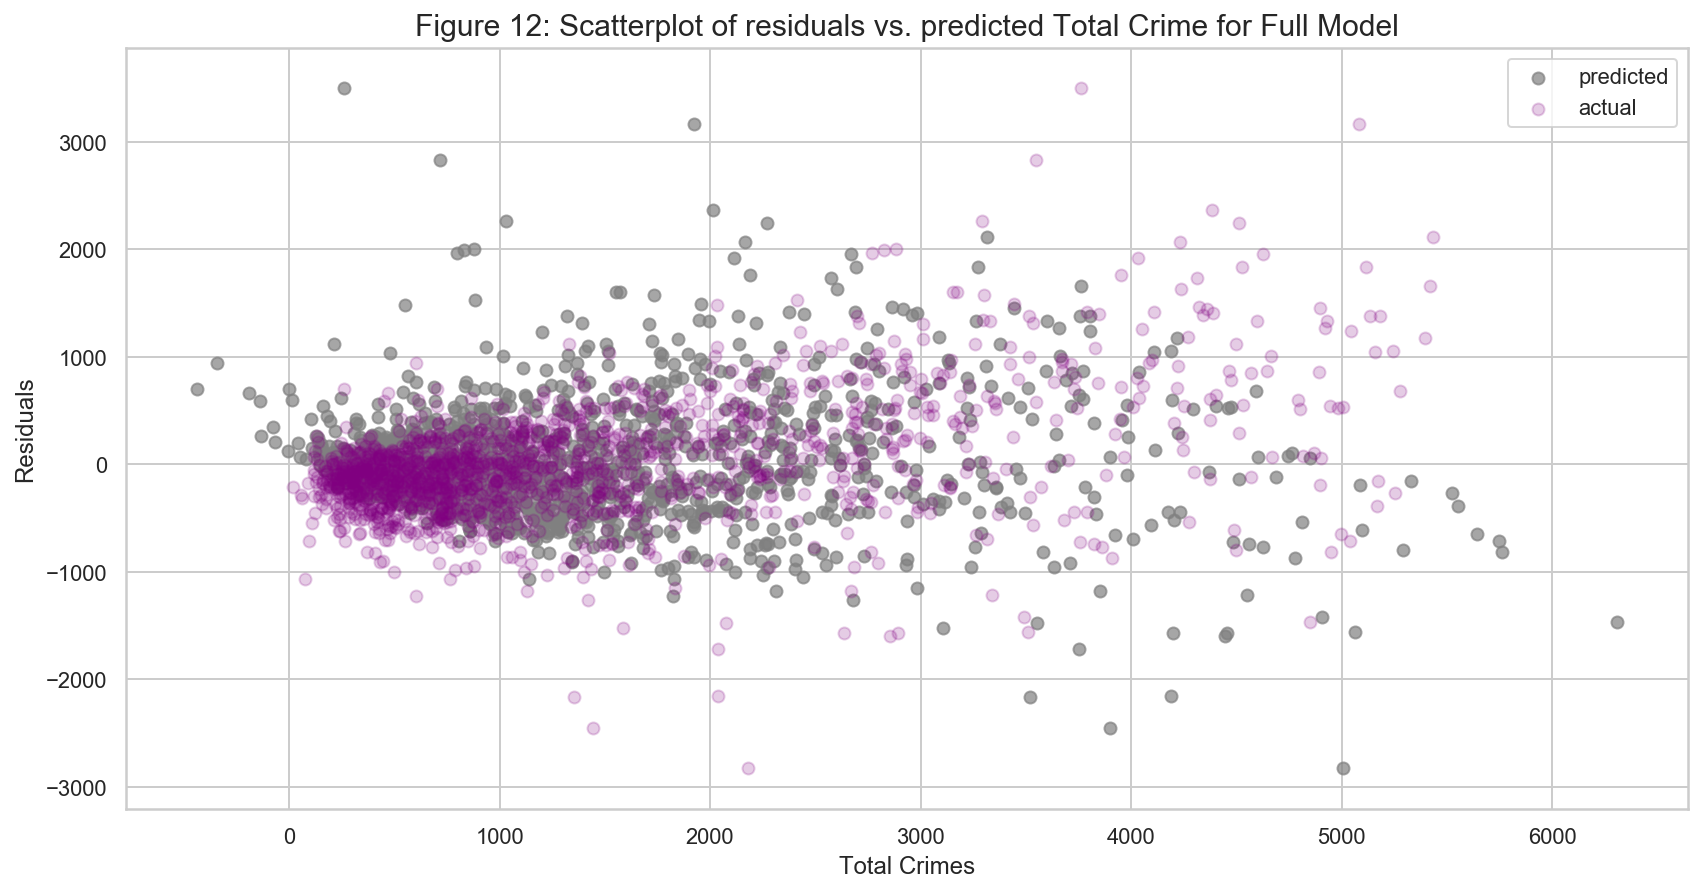

In [27]:
plt.subplots(figsize=(14,7))
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.7,color = 'grey',label = 'predicted');
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.2,color = 'purple',label = 'actual');
plt.xlabel('Total Crimes');
plt.ylabel('Residuals')
plt.legend()
plt.title('Figure 12: Scatterplot of residuals vs. predicted Total Crime for Full Model', fontsize=15)
plt.show();

The dots from Figure 12 does not exhibit any banding pattern and being mostly random while centered around 0 residual especially total crimes that are below 2000. Hence, confirming that the constant variability assumption of linear regression is satisfied.

Furthermore, the dots above the total crimes of 2000 have more stronger randomness and the residuals are more spread apart compared to the total crimes below 2000. Therefore, the model becomes more inconsistent when it comes to predicting higher total crimes.

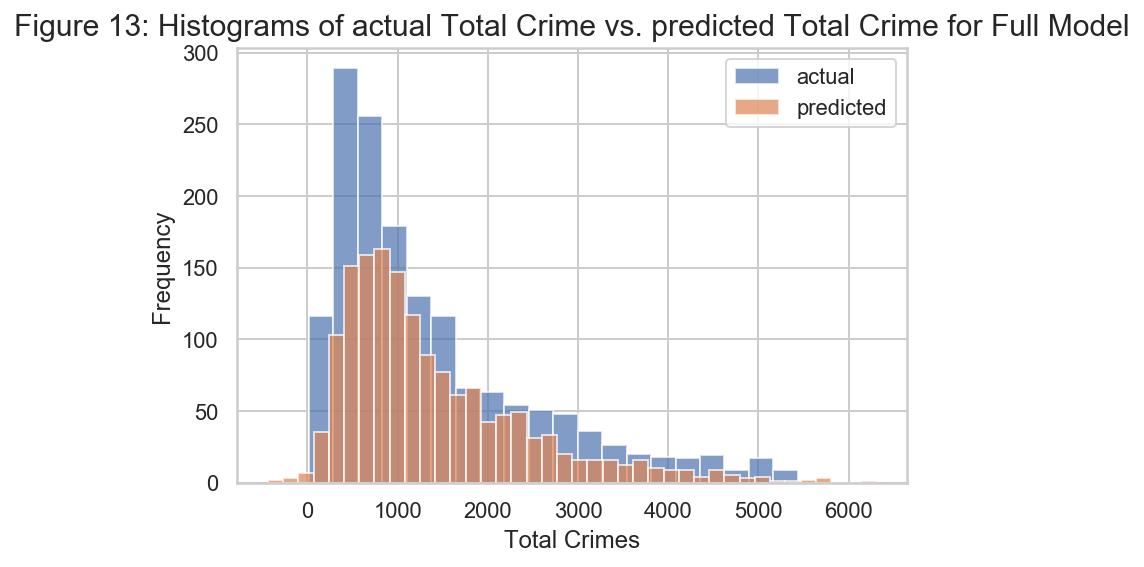

In [28]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=40, alpha=0.7);
plt.xlabel('Total Crimes');
plt.ylabel('Frequency');
plt.title('Figure 13: Histograms of actual Total Crime vs. predicted Total Crime for Full Model', fontsize=15);
plt.legend()
plt.show();

From Figure 12, the actual and predicted total crimes are differently distributed. In both, total crimes are highly clustered between 500 to 1000 crimes, but the actual total crimes between 500 to 1000 range is considerably higher than the predicted model.

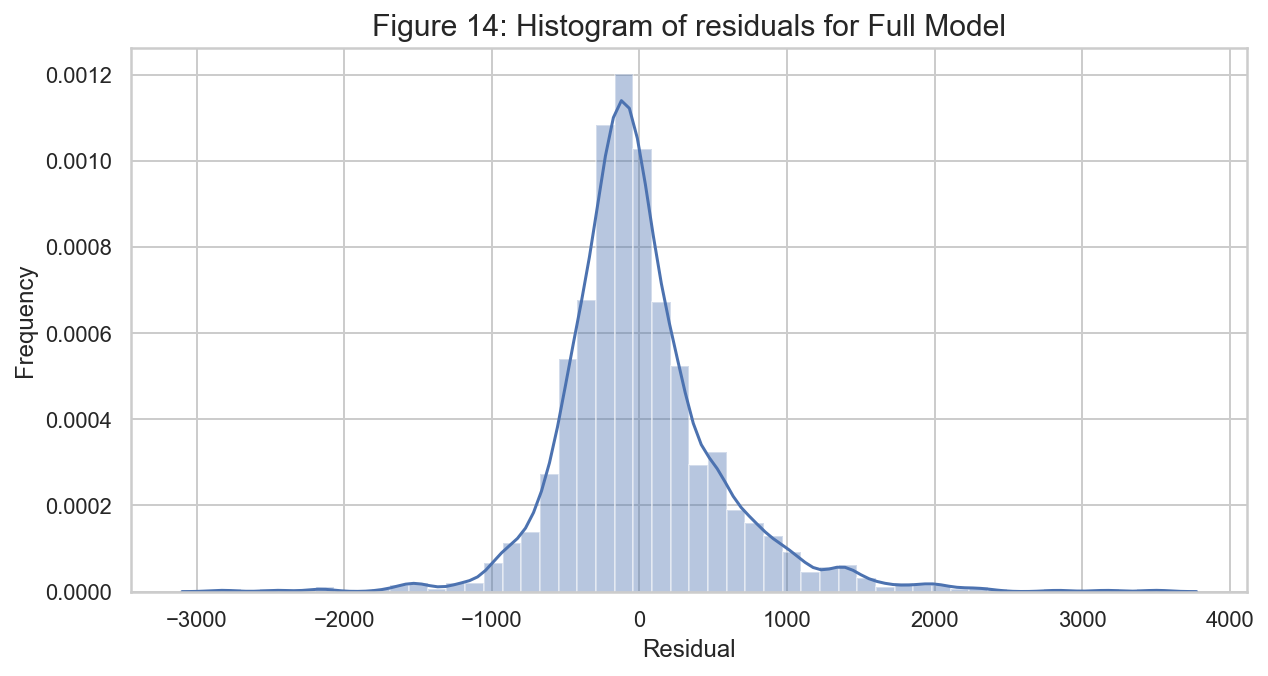

In [29]:
plt.subplots(figsize=(10,5))
# plt.hist(residuals_full['residual'], bins = 80);
sns.distplot(residuals_full['residual'], kde = True)
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 14: Histogram of residuals for Full Model', fontsize=15);
plt.show();

Looking at Figure 14, it can be observed that graph is symmetric unimodal around the mark 0. This suggests that the residuals are nearly normally distributed. 

However, the graph is slightly right skewed, suggesting that there are more negative residuals than positive residuals. Thus, the full model is over-predicting more total crimes in a community than under-predicting.  

## Backwards Feature Selection <a id='backwards'/>

There are about two ways to perform backwards Feature selection to improve the prediction of the model. One is to do with reference to the adjusted R-squared value and the other is to do with reference to p-values. The idea with backwards feature selection is to start with the full model and remove one feature at a time and check the reference value (either adjusted R-squared or p-values) (David Diez, 2019).

- **Backwards feature selection with adjusted R-squared**: The aim in this method is to have high adjusted R-squared value. Starting with the full model, the first step is to drop one variable at a time and record adjusted R-squared of each smaller model. Then pick the model with the highest increase in adjusted R-squared. Finally, repeat until none of the models yield an increase in adjusted R-squared.

- **Backwards feature selection with p-values**: The aim in this method is to only have variables with p-values which are less than the chosen significant level. This can be done by just removing variables that have p-values greater than the significant level.

This study uses backwards feature selection with p-values. This methodology is adpoted mainly because to find features that are highly significant for predicting the total crimes. Although using backwards feature with adjusted R-squared would increase accuracy, but since the current adjusted R-squared is decently high for a prediction and it would be better to know which variables are highly significant for a prediction. Removing insignificant feature can be done with variables where p-values are greater or equal to 5% significant level.

In [30]:
# (ranking, n.d.)
# create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        if (patsy.Term([patsy.EvalFactor(term_components[0])]) in patsy_description.rhs_termlist):
            patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=crimeDataReduced).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = crimeDataReduced).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "numUsePubTrans" with p-value 0.5738

Removing term "numNotHSgrad" with p-value 0.5537

Removing term "numImmig_10" with p-value 0.3102

Removing term "numAsian" with p-value 0.3311

Removing term "numNotSpeakEng" with p-value 0.2641

***
                            OLS Regression Results                            
Dep. Variable:           Total_Crimes   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     308.0
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:09:46   Log-Likelihood:                -11865.
No. Observations:                1539   AIC:                         2.377e+04
Df Residuals:                    1520   BIC:                         2.387e+04
Df Model:                          18                     

Using the backwards feature selection algorithm, independent variables such `numUsePubTrans`, `numNotHSgrad`, `numImmig_10`, `numNotSpeakEng` and `numAsian` with p-values as $0.5738$, $0.5537$, $0.3102$, $0.3311$and $0.2641$ respectively have been removed from the full model. The features in this new reduced model are highly significant.

After the removal of some features, adjusted R-squared has not changed, meaning that the accuracy of the model still stays the same. Therefore, backwards feature selection with p-values is an improved model with more significant features and still maintain high accuracy.

## Actual vs Reduced Model Predicted Crime

Similarly with the full model, it is important to understand the difference between the actual and predicted values

In [31]:
residuals_reduced = pd.DataFrame({'actual': crimeDataReduced['Total_Crimes'], 
                            'predicted': model_reduced_fitted.fittedvalues, 
                            'residual': model_reduced_fitted.resid})
residuals_reduced.head(10)

,actual,predicted,residual
0,175,225.633744,-50.633744
1,490,752.601628,-262.601628
2,2308,1403.363894,904.636106
6,626,998.914190,-372.914190
8,3880,4033.829058,-153.829058
11,3092,2294.964504,797.035496
12,2891,2908.285662,-17.285662
16,1468,1759.233206,-291.233206
18,552,505.155553,46.844447
22,928,1579.472869,-651.472869


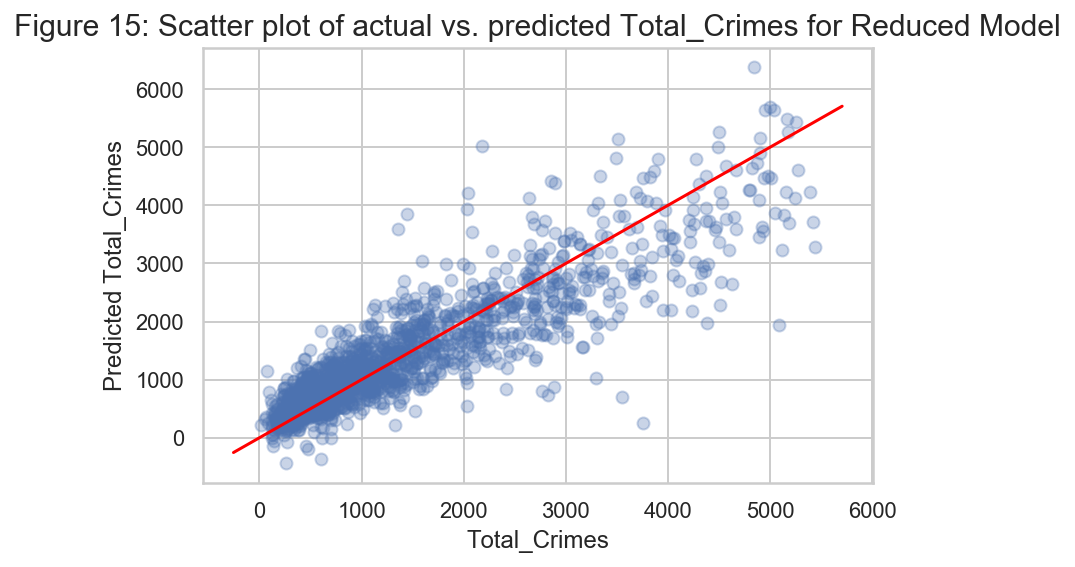

In [32]:
# get a scatter plot
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Total_Crimes');
plt.ylabel('Predicted Total_Crimes');
plt.title('Figure 15: Scatter plot of actual vs. predicted Total_Crimes for Reduced Model', fontsize=15);
plt.show(); 

Figure 15 above is the scatter plot for actual crimes vs predicted total crimes in the reduced model. Upon comparison with the full model, the points of the graph tend to meet the truth value a lot more than they did in the full model. However, there is the same scenario where the total crime after 2500 tends showcase an underestimation from predicted crimes and total crime before 2500 showcasing an overestimation. However, the estimation does not seem to be as apparent as the full model had showcased - which was ultiamtely the goal.

## Reduced Model Diagnostic Checks <a id='reduced_diagnostic'/>

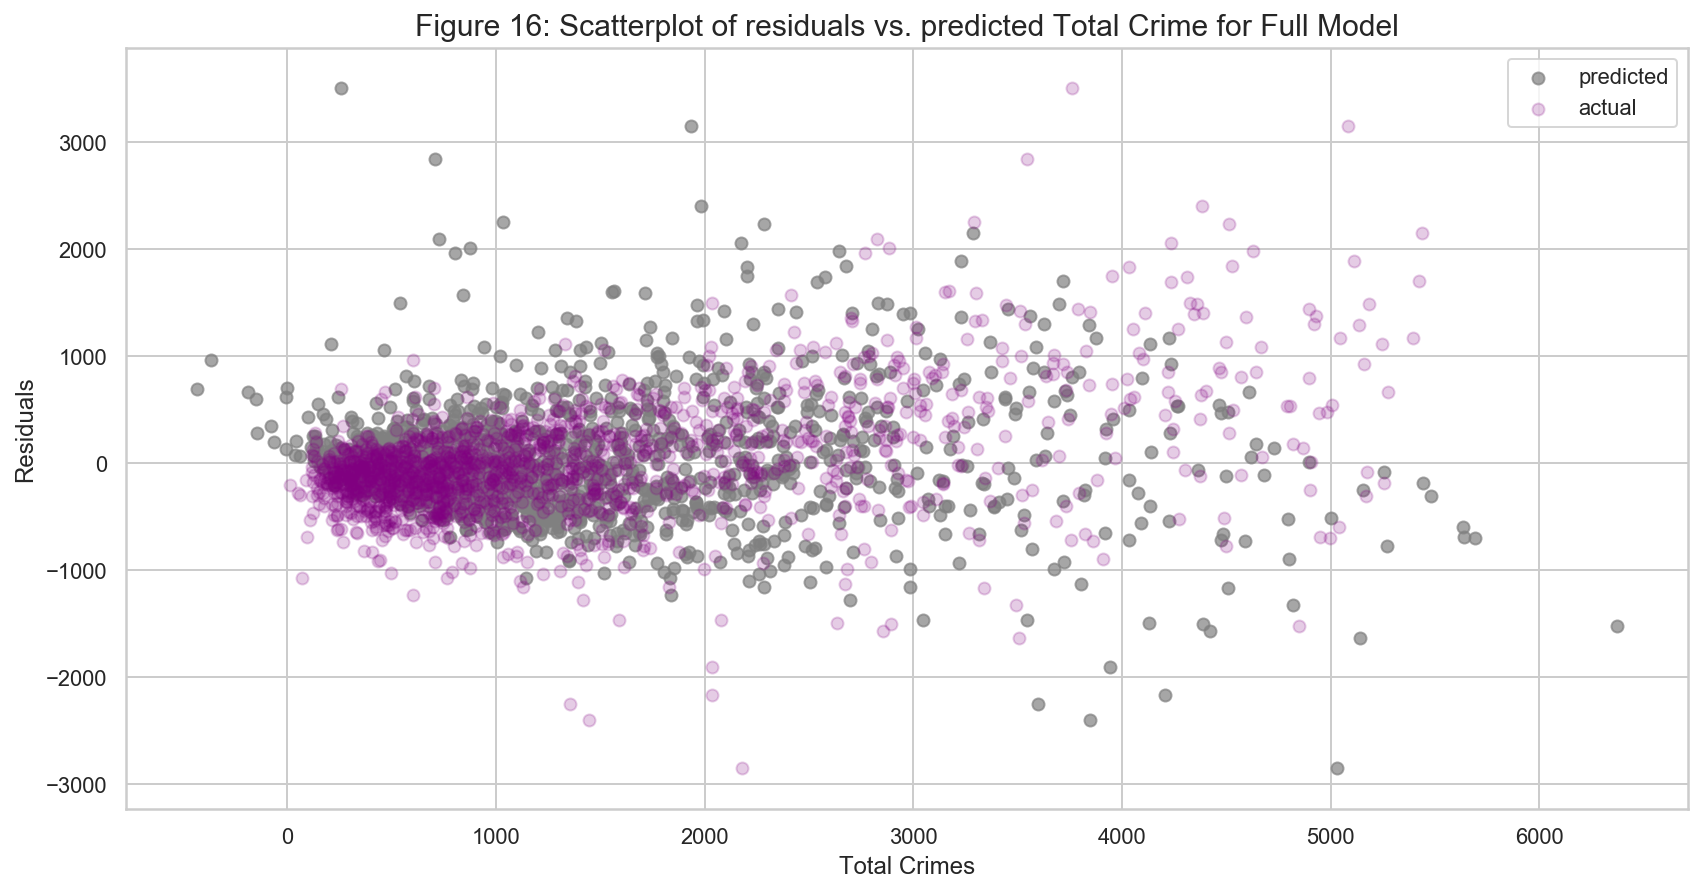

In [33]:
plt.subplots(figsize=(14,7))
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.7,color = 'grey',label = 'predicted');
plt.scatter(residuals_reduced['actual'], residuals_reduced['residual'], alpha=0.2,color = 'purple',label = 'actual');
plt.xlabel('Total Crimes');
plt.ylabel('Residuals')
plt.legend()
plt.title('Figure 16: Scatterplot of residuals vs. predicted Total Crime for Full Model', fontsize=15)
plt.show();

The graph from Figure 16, is very identical to the graph in Figure 12, stating the there is not any banding patterns and the constant variability assumption of linear regression is still satisfied for the reduced model.

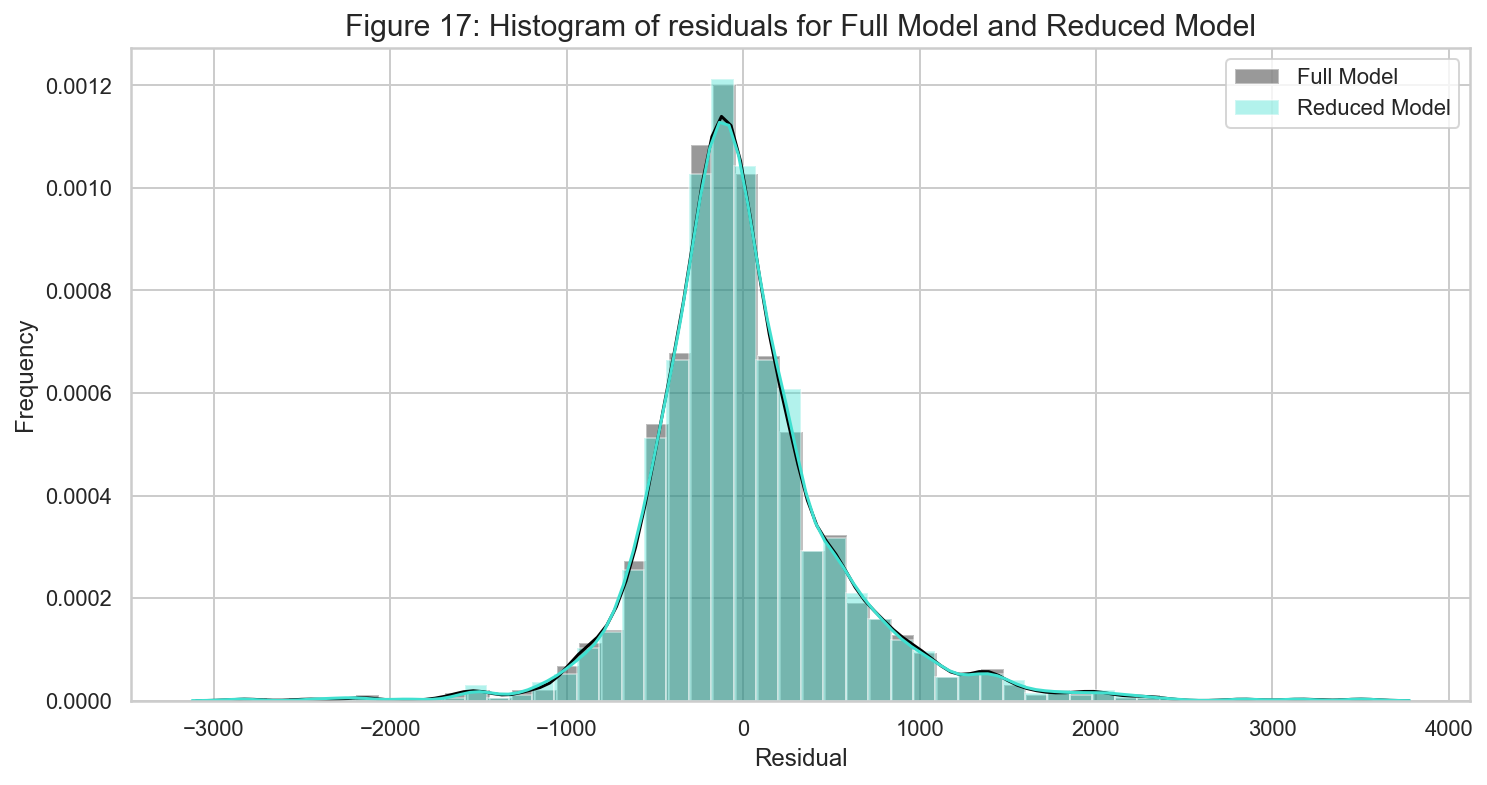

In [34]:
plt.subplots(figsize=(12,6))
sns.distplot(residuals_full['residual'], kde = True,color = 'black',label = 'Full Model')
sns.distplot(residuals_reduced['residual'], kde = True,color = 'turquoise',label = 'Reduced Model')
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.legend()
plt.title('Figure 17: Histogram of residuals for Full Model and Reduced Model', fontsize=15);
plt.show();

The Figure 17 does a comparsion of residuals between the full model and reduced model. There is not huge noticeable difference between the two models. The only changes which can be seen is that the peak is slightly increased and there are moderately decreased negative residuals. Hence, increase in positive residual and making more symmetrical.

## Summary and Conclusions <a id='summary_conclusions'/>

To conclude, hrough the explantory features from `crimeDataReduced` dataset, a robust and functioning full model was produced with an adjusted R-squared of 0.782. Then the full model was improved using backwards feature selection with a p-value cutoff value of 0.05. This improved and reduced model maintained the accuracy of the full model but only included the signifacant variables. This reduced model consisted 19 different variables, started with 67, reduced to 32 and used 24 for full model.

The final multiple linear regrssion model has an adjusted R-squared value of 78.2%, which is fairly high. So, it exhibits that the variables used are adequate and reasonable for accurately predicting the total number of crimes in a community.

Diagnostic checks of the models verifies that the models obey the four conditions of regression, evidenting a clear relation between the independent variables and dependent target feature. 

The final model can be useful for practical purposes for total crime below 2500 as it performs correctly and accurately below 2500 total crimes in general. In essence, the margin of error in the prediction increases as the total crimes in the community increases.  

However, it can be said that model to predict crimes can be improved. One of the way to improve the adjusted R-squared is to have more higher degree variables or apply non-linear modeling tool to the `crimes and community` dataset.

## References <a id='references'/>

Stobierski, T. (2019, 10 29). WHAT IS STATISTICAL MODELING FOR DATA ANALYSIS? Retrieved from Northeastern University graduate programs: https://www.northeastern.edu/graduate/blog/statistical-modeling-for-data-analysis/

David Diez, M. C.-R. (2019). OpenIntro Statistics.

Redmon, M. (02, 03 2011). Communities and Crime Unnormalized Data Set . Retrieved from UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

Ranking, f. (n.d.). Predicting Age in Census Data. Retrieved from featureranking.com: https://www.featureranking.com/tutorials/statistics-tutorials/regression-case-study/